# Requirements

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [26]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [27]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [28]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

KeyboardInterrupt: 

In [ ]:
# Print the page source code.
print(browser.page_source)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [4]:
driver = webdriver.Chrome()
driver.get('https://finance.yahoo.com/crypto')

True


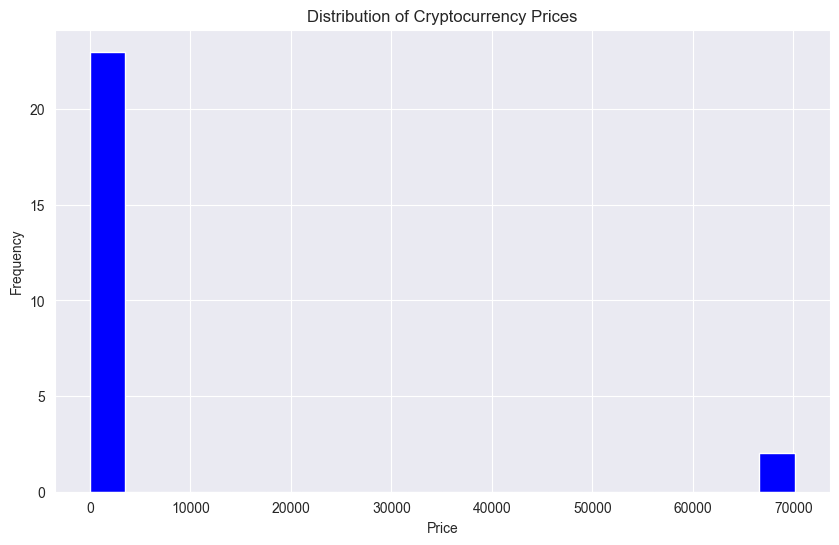

In [5]:

crypto_names = driver.find_elements(By.CSS_SELECTOR, "tr.yf-paf8n5 td:nth-of-type(2) span div")
prices = driver.find_elements(By.CSS_SELECTOR, "tr.yf-paf8n5 td:nth-of-type(4) span")
caps = driver.find_elements(By.CSS_SELECTOR, "tr.yf-paf8n5 td:nth-of-type(7) span")
print(len(prices) == len(crypto_names) == len(caps))
data = []
for i in range(len(crypto_names)):
    dict = {
        "Crypto name": crypto_names[i].text,
        "Price": float(prices[i].text.replace(",","")),
        "Cap":caps[i].text
    }
    data.append(dict)
df = pd.DataFrame(data)
df.to_csv('data_crypto.csv')
driver.quit()
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=20, color='blue')
plt.title("Distribution of Cryptocurrency Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Add as many code boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [13]:
driver = webdriver.Chrome()
driver.get('https://finance.yahoo.com/crypto')

In [14]:
btc_usd = driver.find_element(By.CSS_SELECTOR, "#\30  > td:nth-child(1) > span > div > a")
btc_usd.click()
historical_data = driver.find_element(By.CSS_SELECTOR, "#nimbus-app > section > section > aside > section > nav > ul > li:nth-child(5) > a")
historical_data.click()

dates = driver.find_elements(By.CSS_SELECTOR, "tr.yf-h2urb6 td:nth-of-type(1)")
close = driver.find_elements(By.CSS_SELECTOR, "tr.yf-h2urb6 td:nth-of-type(5)")
volume = driver.find_elements(By.CSS_SELECTOR, "tr.yf-h2urb6 td:nth-of-type(7)")
data = []
for i in range(len(dates)):
    dict = {"Volume": float(volume[i].text.replace(",","")),
            "Close": float(close[i].text.replace(",","")),
            "Date": dates[i].text,}
    data.append(dict)
df = pd.DataFrame(data)
df.to_csv('data_crypto_volume.csv')
driver.quit()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='blue')
plt.title('BTC-USD Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


InvalidSelectorException: Message: invalid selector
from javascript error: {"status":32,"value":"An invalid or illegal selector was specified"}
  (Session info: chrome=130.0.6723.92); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#invalid-selector-exception
Stacktrace:
0   chromedriver                        0x0000000100fdf648 cxxbridge1$str$ptr + 3645404
1   chromedriver                        0x0000000100fd7ea8 cxxbridge1$str$ptr + 3614780
2   chromedriver                        0x0000000100a44104 cxxbridge1$string$len + 88416
3   chromedriver                        0x0000000100a4919c cxxbridge1$string$len + 109048
4   chromedriver                        0x0000000100a4a8a0 cxxbridge1$string$len + 114940
5   chromedriver                        0x0000000100a4a918 cxxbridge1$string$len + 115060
6   chromedriver                        0x0000000100a860a8 cxxbridge1$string$len + 358660
7   chromedriver                        0x0000000100abfbd0 cxxbridge1$string$len + 594988
8   chromedriver                        0x0000000100a7af54 cxxbridge1$string$len + 313264
9   chromedriver                        0x0000000100a7bba4 cxxbridge1$string$len + 316416
10  chromedriver                        0x0000000100faa1e8 cxxbridge1$str$ptr + 3427196
11  chromedriver                        0x0000000100fad52c cxxbridge1$str$ptr + 3440320
12  chromedriver                        0x0000000100f9160c cxxbridge1$str$ptr + 3325856
13  chromedriver                        0x0000000100faddf0 cxxbridge1$str$ptr + 3442564
14  chromedriver                        0x0000000100f82890 cxxbridge1$str$ptr + 3265060
15  chromedriver                        0x0000000100fc8898 cxxbridge1$str$ptr + 3551788
16  chromedriver                        0x0000000100fc8a14 cxxbridge1$str$ptr + 3552168
17  chromedriver                        0x0000000100fd7b40 cxxbridge1$str$ptr + 3613908
18  libsystem_pthread.dylib             0x00000001855e1f94 _pthread_start + 136
19  libsystem_pthread.dylib             0x00000001855dcd34 thread_start + 8
